# Upset Plot - Visualizing effect sizes across ancestries
- **Project:** Multi-ancestry PRS
- **Version:** Python/3.9
- **Status:** COMPLETE
- **Last Updated:** 16-NOV-2023

### Import libraries

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#import warnings
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
upsetPRSdata = pd.read_csv('./toUPSET.tab', sep='\t')
upsetPRSdata.head()

,SNP,A1_AAC,BETA_AAC,P_AAC,A1_AFR,BETA_AFR,P_AFR,A1_AMR,BETA_AMR,P_AMR,...,P_CAS,A1_EAS,BETA_EAS,P_EAS,A1_EUR,BETA_EUR,P_EUR,A1_AJ,BETA_AJ,P_AJ
0,1:154925709,NaN,NaN,NaN,NaN,NaN,NaN,C,0.463105,0.4979,...,0.1909,C,NaN,NaN,C,0.337186,6.532000e-03,C,0.974182,0.210100
1,1:155162560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,0.624868,4.480000e-10,A,1.070898,0.165100
2,1:155235843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C,1.040983,7.025000e-03,C,0.978702,0.000052
3,1:161499264,NaN,NaN,NaN,C,0.088011,0.1807,C,0.078811,0.5349,...,0.7433,C,0.097127,2.673000e-01,C,0.041343,1.000000e-01,C,0.133656,0.144600
4,1:171750629,NaN,NaN,NaN,T,0.076961,0.3097,T,0.049742,0.7709,...,0.7473,T,0.425921,1.000000e-07,T,-0.035213,2.668000e-01,T,0.031499,0.780300


In [3]:
upsetPRSdata['CHR'] = upsetPRSdata['SNP'].str.extract(r'^(\d+)').astype(int)
upsetPRSdata['BP'] = upsetPRSdata['SNP'].str.extract(r'(\d+)$').astype(int)
upsetPRSdata = upsetPRSdata.sort_values(by=['CHR','BP'])
upsetPRSdata.head()

,SNP,A1_AAC,BETA_AAC,P_AAC,A1_AFR,BETA_AFR,P_AFR,A1_AMR,BETA_AMR,P_AMR,...,BETA_EAS,P_EAS,A1_EUR,BETA_EUR,P_EUR,A1_AJ,BETA_AJ,P_AJ,CHR,BP
0,1:154925709,NaN,NaN,NaN,NaN,NaN,NaN,C,0.463105,0.4979,...,NaN,NaN,C,0.337186,6.532000e-03,C,0.974182,0.210100,1,154925709
1,1:155162560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,A,0.624868,4.480000e-10,A,1.070898,0.165100,1,155162560
2,1:155235843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,C,1.040983,7.025000e-03,C,0.978702,0.000052,1,155235843
3,1:161499264,NaN,NaN,NaN,C,0.088011,0.1807,C,0.078811,0.5349,...,0.097127,2.673000e-01,C,0.041343,1.000000e-01,C,0.133656,0.144600,1,161499264
4,1:171750629,NaN,NaN,NaN,T,0.076961,0.3097,T,0.049742,0.7709,...,0.425921,1.000000e-07,T,-0.035213,2.668000e-01,T,0.031499,0.780300,1,171750629


In [4]:
upsetPRSdata_inputdata = upsetPRSdata.rename(columns={
    'BETA_AAC':'AAC',
    'BETA_AFR':"AFR",
    'BETA_AJ':'AJ',
    'BETA_AMR':"AMR",
    'BETA_CAS':"CAS",
    'BETA_EAS':"EAS",
    'BETA_EUR':'EUR'
})[['SNP','AAC','AFR','AJ','AMR','CAS','EAS','EUR']]

In [5]:
for i,row in upsetPRSdata_inputdata.iterrows():
    SNP = row['SNP']
    for ANC in ['AAC','AFR','AJ','AMR','CAS','EAS','EUR']:
        beta = row[ANC]
        tempDF = pd.DataFrame({
            'ANC':ANC,
            'SNP':SNP,
            'BETA':beta
        }, index=[0])
        if (i==0) & (ANC=='AAC'):
            inputDF = tempDF
        else:
            inputDF = pd.concat([inputDF, tempDF]).reset_index(drop=True)

In [6]:
pal=["#6B1414","#C14E4E","#CF9FFF","#1E90FF", "#000000"]

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Want purple to be right at beta=0
quantiles = inputDF["BETA"].describe().loc[['min','25%','50%','75%','max']].tolist()
quantiles[2]=0
quantiles_norm=NormalizeData(quantiles)
cmp=LinearSegmentedColormap.from_list("", list(zip(quantiles_norm, pal)))

/tmp/ipykernel_1837968/1115017604.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_bottom.set_xticklabels(inputDF.drop_duplicates(subset='SNP')['SNP'], rotation=45, ha='right')


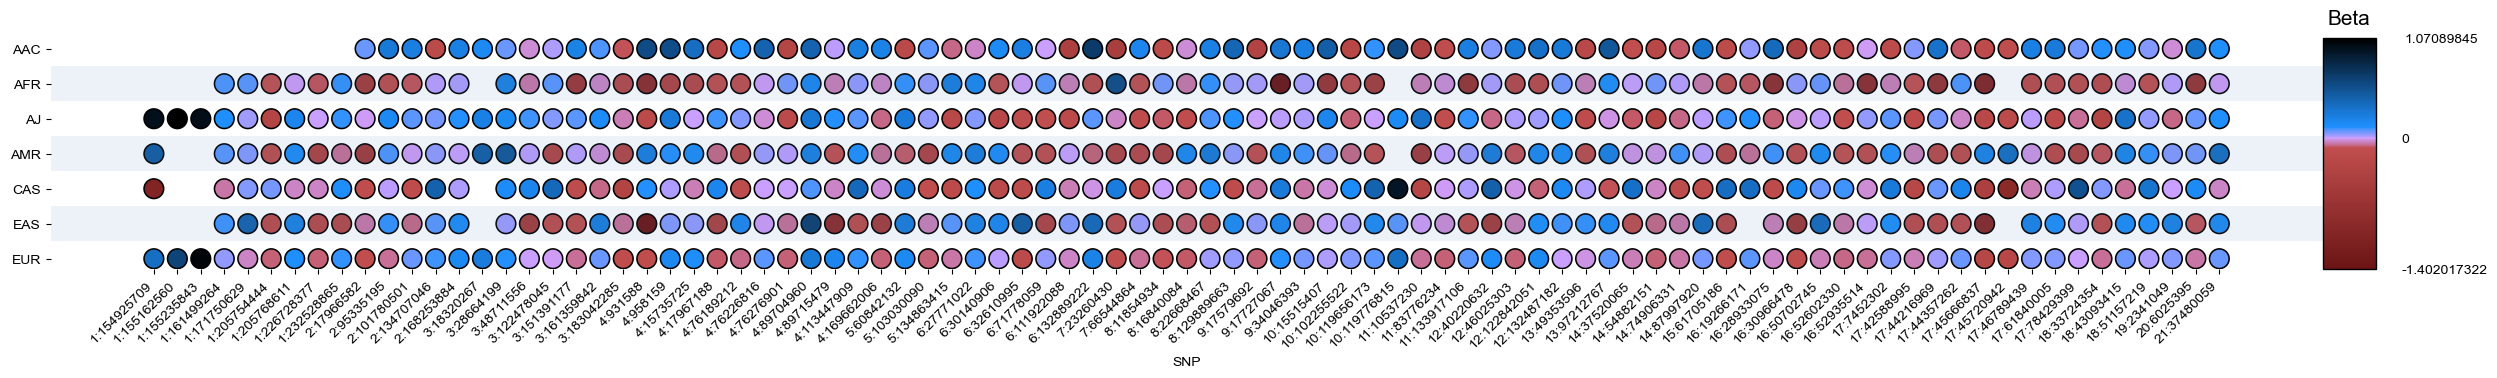

In [7]:
fig, ax = plt.subplots(
    figsize=(30,3),
    sharex='col'
)
fig.clf()
gs = gridspec.GridSpec(1, 2, width_ratios=(30,0.7))

ax1 = fig.add_subplot(
    gs[0, 0]
)
ax2 = fig.add_subplot(
    gs[0, 1]
)


sns.set_style({'font_scale': 2, 'axes.facecolor':'white', 'grid.color': '.8'})
sns.set_theme(style="white", palette=None)
#plt.figure(figsize=(28,3))
#plt.margins(y=0.1)
plt.margins(x=0.01, y=0.05)
plt.subplots_adjust(wspace=0, hspace=0)
# plt.xticks(rotation=45,ha='right')
plot_bottom = sns.scatterplot(inputDF, x='SNP',y='ANC',hue='BETA', s=200,
                      edgecolor='black', palette=cmp, legend='brief', ax=ax1)
# plot_bottom.collections[0].set_sizes([200])
#plot_bottom.axes.xaxis.set_ticks_position("top")

#plot_bottom.axes.xaxis.set_ticks_position("top")

plot_bottom.spines["top"].set_visible(False) 
plot_bottom.spines["bottom"].set_visible(False) 
plot_bottom.spines["left"].set_visible(False) 
plot_bottom.spines["right"].set_visible(False) 
plot_bottom.set_xticklabels(inputDF.drop_duplicates(subset='SNP')['SNP'], rotation=45, ha='right')
#plot_bottom.tick_params(axis='y', which='both',length=0,pad=0)
#plot_bottom.tick_params(axis='x', which='both',length=0,pad=0)
plot_bottom.get_legend().remove()#(ncol=1, loc="lower left", frameon=True)



plot_bottom.axhspan(ymin=0.5, ymax=1.5, color='steelblue', alpha=0.1, lw=0)
plot_bottom.axhspan(ymin=2.5, ymax=3.5, color='steelblue', alpha=0.1, lw=0)
plot_bottom.axhspan(ymin=4.5, ymax=5.5, color='steelblue', alpha=0.1, lw=0)
plot_bottom.set_ylabel('')

sm = plt.cm.ScalarMappable(cmap=cmp)
sm.set_array([])
#position=fig.add_axes([0.795,0.75,0.12,0.03])
#position=fig.add_axes([0.65,0.85,0.13,0.04])

cb_ticks=[inputDF['BETA'].min(), 0, inputDF['BETA'].max()]
#cb=plt.colorbar(sm, aspect=8, ax=ax2, cax=position, orientation="horizontal", ticks=NormalizeData(cb_ticks))
cb = plt.colorbar(
    sm,
    cax=ax2,
    ticks=NormalizeData(cb_ticks)
)
cb.ax.set_yticklabels(cb_ticks) 
cb.outline.set_color('black')
cb.outline.set_linewidth(1)
cb.ax.tick_params(labelsize=10, pad=15, width=0)
cb.ax.set_title('Beta',size=15, pad=10)

fig.savefig('multi-ancestry_prs-dotmatrix.png',facecolor='white', dpi=300, bbox_inches = "tight")